In [1]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error

df_onehot = pd.read_csv('train_onehot.csv', index_col='날짜')
df_onehot.head()

,판매량,프로모션진행개수,연도,월,일,요일,Additional,Bridge,Event,Holiday,Transfer,Work Day
날짜,,,,,,,,,,,,
2013-01-01,0.00,0,2013,1,1,1,0,0,0,1,0,0
2013-01-02,778.70,0,2013,1,2,2,0,0,0,0,0,0
2013-01-03,384.74,0,2013,1,3,3,0,0,0,0,0,0
2013-01-04,387.55,0,2013,1,4,4,0,0,0,0,0,0
2013-01-05,564.30,0,2013,1,5,5,0,0,0,0,0,1


In [2]:
feature_names = df_onehot.columns.to_list()
feature_names.remove('판매량')
feature_names

['프로모션진행개수',
 '연도',
 '월',
 '일',
 '요일',
 'Additional',
 'Bridge',
 'Event',
 'Holiday',
 'Transfer',
 'Work Day']

In [3]:
label_name = '판매량'

X = df_onehot[feature_names]
y = df_onehot[label_name]

X.shape, y.shape

((1714, 11), (1714,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1371, 11), (343, 11), (1371,), (343,))

In [5]:
# 목적 함수 정의
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt'])
    
    # Random Forest 모델 생성
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 검증 데이터에 대한 예측
    y_valid_pred = model.predict(X_valid)
    
    # 검증 데이터에 대한 정확도 계산
    r2 = r2_score(y_valid, y_valid_pred)
    
    return r2


In [6]:
study = optuna.create_study(direction='maximize') # r2 score를 최대화하므로 'maximize'로 설정
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_score = study.best_value
print('Best Parameters:', best_params)
print('Best r2 score:', best_score)

[I 2023-05-17 17:12:49,506] A new study created in memory with name: no-name-b0c46e86-9906-4ff3-80ac-7085196f87e7
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2023-05-17 17:12:55,082] Trial 0 finished with value: 0.7056884042003309 and parameters: {'n_estimators': 400, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 0 with value: 0.7056884042003309.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for

[I 2023-05-17 17:14:06,606] Trial 15 finished with value: 0.6051758705876771 and parameters: {'n_estimators': 1000, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.7243095658940467.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2023-05-17 17:14:10,231] Trial 16 finished with value: 0.7206878098858776 and parameters: {'n_estimators': 600, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 10 with value: 0.7243095658940467.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

[I 2023-05-17 17:15:20,917] Trial 30 finished with value: 0.7238462120994769 and parameters: {'n_estimators': 400, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 22 with value: 0.7247682186150417.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2023-05-17 17:15:26,241] Trial 31 finished with value: 0.724607109341977 and parameters: {'n_estimators': 600, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 22 with value: 0.7247682186150417.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

[I 2023-05-17 17:16:07,247] Trial 45 finished with value: 0.7208087077373306 and parameters: {'n_estimators': 700, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 22 with value: 0.7247682186150417.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2023-05-17 17:16:09,384] Trial 46 finished with value: 0.7239457645327472 and parameters: {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 22 with value: 0.7247682186150417.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will

[I 2023-05-17 17:17:10,313] Trial 59 finished with value: 0.721664731311723 and parameters: {'n_estimators': 900, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 22 with value: 0.7247682186150417.
[I 2023-05-17 17:17:12,895] Trial 60 finished with value: 0.5718562355993211 and parameters: {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.7247682186150417.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2023-05-17 17:17:16,980] Trial 61 finished with value: 0.724607109341977 and parameters: {'n_estimators': 600, 'max_depth': 15, 'min_samples_spli

[I 2023-05-17 17:17:57,637] Trial 73 finished with value: 0.7243106319083026 and parameters: {'n_estimators': 500, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 22 with value: 0.7247682186150417.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2023-05-17 17:18:01,860] Trial 74 finished with value: 0.720809236273668 and parameters: {'n_estimators': 700, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 22 with value: 0.7247682186150417.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will

[I 2023-05-17 17:18:46,188] Trial 87 finished with value: 0.7246072844736304 and parameters: {'n_estimators': 600, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 22 with value: 0.7247682186150417.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2023-05-17 17:18:48,693] Trial 88 finished with value: 0.7243106319083026 and parameters: {'n_estimators': 500, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'auto'}. Best is trial 22 with value: 0.7247682186150417.
[I 2023-05-17 17:18:51,669] Trial 89 finished with value: 0.5518352415008265 and parameters: {'n_estimators': 800, 'max_depth': 12, 'min_samples_

Best Parameters: {'n_estimators': 800, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'auto'}
Best r2 score: 0.7247682186150417


In [7]:
best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)
best_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=14, max_features='auto', min_samples_leaf=10,
                      min_samples_split=3, n_estimators=800, random_state=42)

In [8]:
y_valid_pred = best_model.predict(X_valid)

In [9]:
from sklearn.metrics import mean_squared_log_error, r2_score

print('rmsle:', np.sqrt(mean_squared_log_error(y_valid, y_valid_pred)))
print('r2:', r2_score(y_valid, y_valid_pred))

rmsle: 0.19742834345385674
r2: 0.7247682186150417


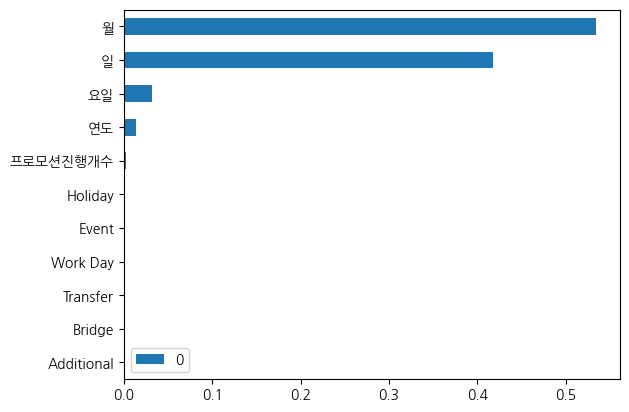

In [10]:
fi = pd.DataFrame(best_model.feature_importances_)
fi.index = best_model.feature_names_in_
fi = fi.sort_values(0)
fi.head(15).plot.barh();

In [11]:
X_test = pd.read_csv('test_1_10_onehot.csv')
X_test.head()

,날짜,프로모션진행개수,연도,월,일,요일,Additional,Holiday,Transfer
0,2017-08-16,1,2017,8,16,2,0,0,0
1,2017-08-17,0,2017,8,17,3,0,0,0
2,2017-08-18,0,2017,8,18,4,0,0,0
3,2017-08-19,0,2017,8,19,5,0,0,0
4,2017-08-20,0,2017,8,20,6,0,0,0


In [12]:
X_test = X_test.set_index('날짜')

X_test['Bridge'] = 0
X_test['Event'] = 0
X_test['Work Day'] = 0

In [13]:
X_test = X_test[X_train.columns.to_list()]
X_test.head()

,프로모션진행개수,연도,월,일,요일,Additional,Bridge,Event,Holiday,Transfer,Work Day
날짜,,,,,,,,,,,
2017-08-16,1,2017,8,16,2,0,0,0,0,0,0
2017-08-17,0,2017,8,17,3,0,0,0,0,0,0
2017-08-18,0,2017,8,18,4,0,0,0,0,0,0
2017-08-19,0,2017,8,19,5,0,0,0,0,0,0
2017-08-20,0,2017,8,20,6,0,0,0,0,0,0


In [14]:
# test 예측
y_pred = best_model.predict(X_test)

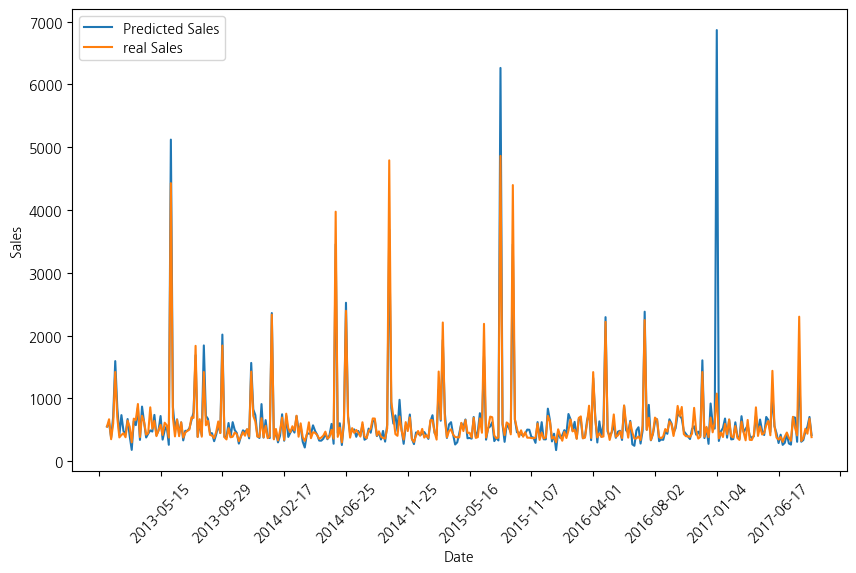

In [15]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.plot(X_valid.sort_index().index, y_valid, label='Predicted Sales')
plt.plot(X_valid.sort_index().index, y_valid_pred, label='real Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# xticks 간격 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30)) # 7일 간격으로 xticks 표시

plt.xticks(rotation=45)
plt.show()

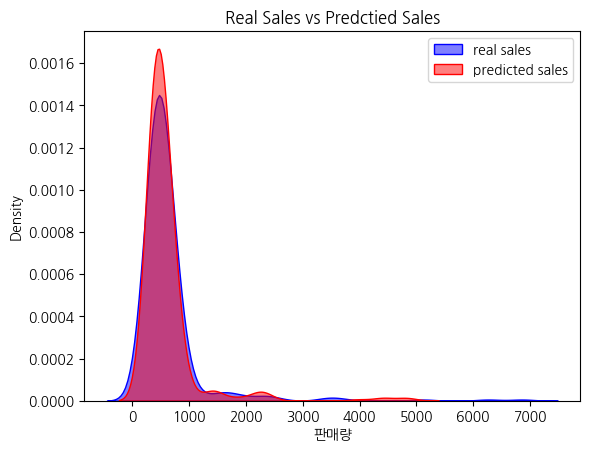

In [16]:
# kdeplot
sns.kdeplot(y_valid, alpha = 0.5, color = 'blue', label = 'real sales', fill = True)
sns.kdeplot(y_valid_pred, alpha = 0.5, color = 'red', label = 'predicted sales', fill = True)
plt.legend()

plt.title('Real Sales vs Predctied Sales')
plt.show()

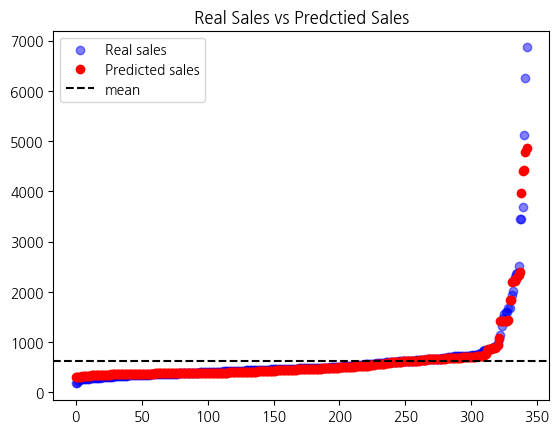

In [17]:
m = np.mean(y_valid)

plt.scatter(range(len(y_valid)),np.sort(y_valid), label = 'real sales', c = 'blue', alpha = 0.5)
plt.scatter(range(len(y_valid_pred)),np.sort(y_valid_pred), label = 'predicted sales', c = 'red')
plt.title('Real Sales vs Predctied Sales')
plt.axhline(m, c = 'k', ls = '--', label = 'mean')

plt.legend(['Real sales','Predicted sales','mean'])
plt.show()